This notebook implements gradient descent and stochastic gradient descent algorithm with a linear regression problem

# Importing Libraries

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Generating data points 

In [2]:
x, y = make_regression(n_samples=100, n_features=1, noise=20,random_state=42)
x = x[:,0]

Text(0, 0.5, 'Variable Y')

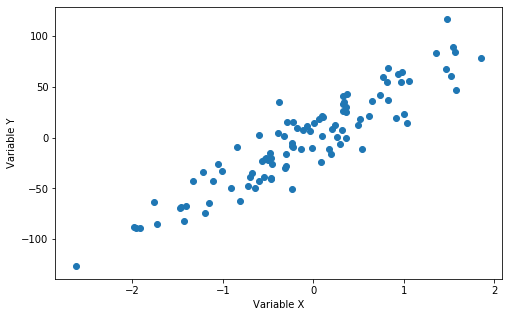

In [3]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(1, 1, 1)

ax1.scatter(x,y)
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

#fig.savefig("linear_plot.png")

# Defining gradient descent and stochastic gradient descent function

In [4]:
def define_prediction_function(x,alpha,beta):
    
    return alpha*x + beta

In [5]:
def define_loss_function(x,y,alpha,beta,prediction_function):
    m = len(y)
    
    return (1/2*m)*np.sum((y-prediction_function(x,alpha,beta))**2)

In [6]:
def compute_gradient_descent(alpha,beta,x,y,learning_rate,loss_function):
    
    m = len(y)
    
    alpha_derivative = (1/m)*np.sum(x*((alpha*x+beta)-y))
    beta_derivative = (1/m)*np.sum((alpha*x+beta)-y)
    
    alpha = alpha - alpha_derivative*learning_rate
    beta = beta - beta_derivative*learning_rate
    
    return alpha,beta

In [7]:
def compute_stochastic_gradient_descent(alpha,beta,x,y,learning_rate,loss_function):
    
    
    index,x_value = random.choice(list(enumerate(x)))
    y_value = y[index]
        
    alpha_derivative = x_value*((alpha*x_value+beta)-y_value)
    beta_derivative = (alpha*x_value+beta)-y_value
    
    alpha = alpha - alpha_derivative*learning_rate
    beta = beta - beta_derivative*learning_rate
    
    print(alpha)

    
    return alpha,beta

In [8]:
prediction_function = define_prediction_function
loss_function = define_loss_function

In [9]:
alpha_grid = beta_grid = np.linspace(-200, 200, 100)
grid_alpha, grid_beta = np.meshgrid(alpha_grid, beta_grid)

# Compute Gradient Descent

In [18]:
alpha = 200
beta = -200
learning_rate = 0.01
epsilon = 0.1
loss_prev = 0

list_point = []
while epsilon >= 0.01:
    alpha,beta = compute_gradient_descent(alpha,beta,x,y,learning_rate,loss_function)
    loss = loss_function(x,y,alpha,beta,prediction_function)
    print(loss)
    epsilon = np.abs(loss - loss_prev)
    print(alpha,beta)
    loss_prev = loss 
    list_point.append((alpha,beta))

    

328131264.7923971
198.52521077239746 -197.8179508867332
321374145.45077455
197.0648885509081 -195.65925378185082
314757131.48776895
195.61888939883244 -193.52366014178702
308277313.313093
194.18707082837207 -191.41092405788484
301931841.8318249
192.76929178590674 -189.3208022285425
295717927.18549323
191.36541263742197 -187.25305393165354
289632837.51937604
189.9752951540857 -185.20744099733759
283673897.77546984
188.59880249797288 -183.18372778095892
277838488.5105946
187.235799207936 -181.1816811364296
272124044.73910624
185.88615118562018 -179.20107038979424
266528054.79971144
184.54972568162157 -177.2416673130935
261048059.24587482
183.22639128178727 -175.30324609850322
255681649.7593334
181.91601789365552 -173.38558333274656
250426468.08623266
180.61847673303456 -171.48845797177592
245280204.99541488
179.33364031071892 -169.611651315722
240240599.25839835
178.06138241934156 -167.75494698410745
235305436.65059417
176.80157812036046 -165.91813089132148
230472548.97332016
175.5541037

7009605.191711774
70.30615970407982 -20.782834873959445
6898523.853459292
70.0904465645613 -20.52763994837502
6789719.844646759
69.87678304446551 -20.27522098262939
6683146.275636178
69.66514930442435 -20.025548088665776
6578757.22540929
69.45552570023975 -19.778591697910464
6476507.721508491
69.24789278093729 -19.534322557875285
6376353.720393915
69.04223128683935 -19.292711728796117
6278252.088208082
68.8385221476578 -19.053730580306983
6182160.581939596
68.63674648060582 -18.817350788149394
6088037.830977609
68.43688558852884 -18.583544330916563
5995843.3190489765
68.23892095805427 -18.352283486832114
5905537.366530104
68.04283425775992 -18.12354083056293
5817081.113125711
67.84860733636089 -17.897289230065766
5730436.500906923
67.65622222091463 -17.67350184346729
5645566.257701175
67.46566111504428 -17.45215211597717
5562433.880826662
67.27690639717973 -17.23321377683391
5481003.621164153
67.08994061881648 -17.016660836283002
5401240.467559176
66.9047465027921 -16.802467582587152
5

47.1641606090524 2.3334731021179387
1561088.8483680328
47.16390816535735 2.3334727878260324
1561088.7859489303
47.16365780981849 2.3334722145230593
1561088.7245576286
47.16340952489141 2.333471386967608
1561088.6641769416
47.16316329318176 2.333470309852461
1561088.6047899772
47.162919097444004 2.3334689878054107
1561088.546380128
47.162676920580054 2.333467425390061
1561088.4889310705
47.162436745638026 2.333465627106626
1561088.4324267595
47.16219855581096 2.3334635973927123
1561088.3768514206
47.161962334435536 2.3334613406240976
1561088.322189549
47.16172806499084 2.3334588611154974
1561088.2684259035
47.16149573109712 2.3334561631213235
1561088.2155454997
47.16126531651455 2.333453250836434
1561088.1635336096
47.161036805142025 2.3334501283968736
1561088.1123757544
47.16081018101592 2.3334467998806065
1561088.0620577002
47.16058542830892 2.3334432693082396
1561088.0125654554
47.160362531328836 2.3334395406437376
1561087.9638852656
47.16014147451741 2.3334356177951294
1561087.91600

# Compute Stochastic Gradient Descent 

In [27]:
alpha = 200
beta = -200
learning_rate = 0.01
epsilon = 0.1
loss_prev = 0

list_point_stochastic = []
while epsilon >= 0.01:
    alpha,beta = compute_stochastic_gradient_descent(alpha,beta,x,y,learning_rate,loss_function)
    loss = loss_function(x,y,alpha,beta,prediction_function)
    print(loss)
    epsilon = np.abs(loss - loss_prev)
    print(alpha,beta)
    loss_prev = loss 
    list_point_stochastic.append((alpha,beta))

    

199.46810827584264
329136706.20087016
199.46810827584264 -197.64416494108914
197.0665804117336
319276899.01938987
197.0665804117336 -194.67379157571534
193.40471629985524
306434557.9347891
193.40471629985524 -191.05831803984168
191.09606867019272
297290916.7443095
191.09606867019272 -188.20282527972455
189.094866593734
288859952.61401886
189.094866593734 -185.4227764120376
188.34739708915993
282684506.38464326
188.34739708915993 -182.86026177089843
187.8287768732842
277579173.59798306
187.8287768732842 -180.6453877957166
183.23269866811123
264093828.08763683
183.23269866811123 -176.88071391197886
183.75372797810735
262820495.34190568
183.75372797810735 -175.86559143121733
184.0892705163431
260797355.36867636
184.0892705163431 -174.58026003210833
183.0159064247976
254964791.68020803
183.0159064247976 -172.25009557524112
182.54676489409277
254919329.7880882
182.54676489409277 -172.5499347935587
182.84611581029372
252611257.02383566
182.84611581029372 -171.11669834948557
183.3231041936417

46.70589736104742 1.9852507306777527
46.7065207705072
1561988.1669566343
46.7065207705072 2.107166198699424
46.76191530142423
1562309.1359990798
46.76191530142423 1.9280190000643724
46.732298667658796
1561943.4159902588
46.732298667658796 2.087540690303262
46.72296478957653
1561797.042699371
46.72296478957653 2.2171596643783915
46.711355013610685
1561822.637424138
46.711355013610685 2.239560673652115
46.64867621651918
1562182.2847743777
46.64867621651918 2.1133738180702237
47.318490195457414
1561460.836183093
47.318490195457414 2.5665957397103436
47.32896811163093
1561339.7726726984
47.32896811163093 2.490813950161227
47.3236133933799
1561269.6544916672
47.3236133933799 2.435654767765387
47.437491788499834
1561691.8749308584
47.437491788499834 2.575808338250544
47.37698543667898
1561487.7382985158
47.37698543667898 2.534525356199275
47.34717543154459
1561309.8971497393
47.34717543154459 2.4396637550261104
47.40391092948821
1561687.7680300276
47.40391092948821 2.6047757402317675
47.4962

46.84707797128011 0.557049890291413
47.01938714172917
1573562.0663899244
47.01938714172917 0.742073887810638
46.98747994577776
1570988.00723286
46.98747994577776 0.9139330487559725
47.166096432665555
1568735.5068919144
47.166096432665555 1.0970270768248511
47.161407965603864
1568613.250616691
47.161407965603864 1.1063711749728282
47.14760945738784
1567202.4439289009
47.14760945738784 1.22568559911367
47.05631043824043
1566250.477900221
47.05631043824043 1.3082094470372483
47.10066094163722
1565858.8998663623
47.10066094163722 1.3501634446893656
47.12917274805123
1566305.0908660297
47.12917274805123 1.3080436636789632
46.76147735957267
1570630.2094388243
46.76147735957267 0.9514039364476607
46.79292705485031
1569942.0399415486
46.79292705485031 0.9999607557019596
46.92209037423361
1571357.005958242
46.92209037423361 0.8877417807945862
47.01448388751226
1574419.4358558445
47.01448388751226 0.6883676206974181
47.14460030936418
1572080.5653728254
47.14460030936418 0.8485058197130692
47.195

46.06646623445746
1575678.7141159973
46.06646623445746 0.8089413957504641
46.31129960602184
1570321.5693732947
46.31129960602184 1.1065948952273048
46.51778663548721
1572644.2574320382
46.51778663548721 0.8511976617470906
46.51498874472667
1571579.8002849694
46.51498874472667 0.929294231450291
46.51221886878481
1570586.5899571772
46.51221886878481 1.0066088330830214
46.507615772788846
1570358.950809891
46.507615772788846 1.0262309493079507
46.26985698716483
1569024.3956882996
46.26985698716483 1.2510171164119583
46.189581708460956
1568848.8334533751
46.189581708460956 1.3235767665992748
46.28494176111708
1572812.209041878
46.28494176111708 0.9162935512595209
46.37998162425258
1574556.6386805223
46.37998162425258 0.7583430464722128
46.58320411160942
1577916.1939537455
46.58320411160942 0.506983621203283
46.82702507567151
1572643.3232700548
46.82702507567151 0.803406297308172
46.82177205128055
1572316.269905326
46.82177205128055 0.8257989337472722
46.89174993301951
1573435.310509061
46.8

46.489740899789915 1.6028432803057193
46.42924890260344
1565054.2768492666
46.42924890260344 1.6332784499957336
46.47786256041445
1565038.5026059719
46.47786256041445 1.5988569174563456
46.60412378602709
1563585.3699266356
46.60412378602709 1.7542504103555516
46.59043410097195
1563504.1195459047
46.59043410097195 1.7806645946410091
46.838498991972735
1562079.317866715
46.838498991972735 1.9419513263152643
46.83003316473165
1562041.1036435892
46.83003316473165 1.9579318155647123
46.87749136763872
1562624.437184505
46.87749136763872 1.7992126307917484
47.0179162174005
1562060.768779958
47.0179162174005 1.8889614047314123
46.780097654740494
1563801.2414698824
46.780097654740494 1.629164580951941
46.792349079389744
1563817.8184417451
46.792349079389744 1.6227612196652421
46.820731775495545
1563893.3811112104
46.820731775495545 1.6035645514447374
46.835479828598864
1563030.6208312626
46.835479828598864 1.7365226183443057
46.80871227007571
1563596.3115930967
46.80871227007571 1.6513427114789

1608520.015815076
50.540989100596114 2.754315489349686
50.550995932616026
1608780.6779170944
50.550995932616026 2.7210816494251215
50.49309520355886
1607176.1527220942
50.49309520355886 2.6506344507014994
50.45342865061837
1606245.769758921
50.45342865061837 2.4986874985895438
50.44723492796886
1606125.131147218
50.44723492796886 2.473089612566133
50.48521716237626
1607292.4876620597
50.48521716237626 2.4189879573798696
50.556888217962175
1609732.5411839243
50.556888217962175 2.287332318144759
50.13756288665516
1598002.9808048238
50.13756288665516 2.5251745079732366
49.917550166116165
1593983.5086978846
49.917550166116165 2.1196659875063455
49.91231179992943
1594145.7216993629
49.91231179992943 2.0657053527156966
49.881864875015346
1592673.7426643525
49.881864875015346 2.2296991733280502
49.88247495427583
1592298.2866194462
49.88247495427583 2.349007755201413
49.86949999093336
1591945.5521605976
49.86949999093336 2.372083072841801
49.92348951084295
1592911.361667727
49.92348951084295 2

46.30909105874362
1570822.287984015
46.30909105874362 3.424839282916747
46.29332723454789
1571342.925045052
46.29332723454789 3.4577371788191162
46.3936272720333
1566328.647816895
46.3936272720333 3.029355265974915
46.31635702051992
1568621.3116237859
46.31635702051992 3.2264188845101067
46.468409739000286
1569257.093902182
46.468409739000286 3.389691690789559
46.49681167272028
1569513.2579207108
46.49681167272028 3.428152380127959
46.49859770825168
1568049.3345654975
46.49859770825168 3.2958262489358696
46.57132239599063
1570165.9795819095
46.57132239599063 3.5202270049336324
46.186749134015095
1568931.0429638596
46.186749134015095 3.14721687875577
46.18731326258365
1569996.6928073512
46.18731326258365 3.2575392317161604
46.181321816349566
1569435.2157735792
46.181321816349566 3.195821087054239
46.164675231451355
1569663.6929309268
46.164675231451355 3.2041964368476106
46.21002630057545
1568640.332307165
46.21002630057545 3.1372004327236573
46.43359263093004
1564902.1408055983
46.4335

45.62582302725779 1.0782838781880668
45.808170057934966
1573231.326519464
45.808170057934966 1.1948260889333704
45.94480410028233
1574339.464429331
45.94480410028233 0.9830296877659597
45.9938970152362
1574368.646835104
45.9938970152362 0.948268810974762
45.983781035593175
1572774.8849150282
45.983781035593175 1.088748779915516
45.99321518996486
1571226.2515571753
45.99321518996486 1.2284556537363018
46.115297162534695
1571006.1840213023
46.115297162534695 1.1576801244509574
46.12999211055426
1569318.5213167714
46.12999211055426 1.3178242358500256
46.04641614223543
1568263.0424498597
46.04641614223543 1.5309694297237841
45.81084725189897
1568951.0584526933
45.81084725189897 1.811670063132706
45.79244182846364
1569231.3598214502
45.79244182846364 1.7892763809899306
45.763201630663154
1569485.2476099308
45.763201630663154 1.8039879200896207
45.53667493644463
1573339.4123412787
45.53667493644463 1.556526515054678
45.40610622439013
1575473.4450972208
45.40610622439013 1.4860356389290073
45

1579543.8233285372
48.384179980604834 0.9064225407771835
48.33167382474936
1583419.3594696303
48.33167382474936 0.6397059593046299
48.3738478876774
1586584.518441615
48.3738478876774 0.4986590490453039
49.02984494400623
1588326.2663439082
49.02984494400623 0.9425319089860579
48.64571459450664
1588805.359238766
48.64571459450664 0.5699513780371753
48.6331977760996
1587616.5598449956
48.6331977760996 0.6234070176231347
48.63142529159306
1587445.5337300098
48.63142529159306 0.6312576401318615
48.66269340116859
1586183.2606530592
48.66269340116859 0.7256481058800484
48.687629681379676
1585870.4034415123
48.687629681379676 0.7641485250540749
48.74166362232846
1587714.2413470645
48.74166362232846 0.7046413573418414
48.68597628095646
1588560.2402098991
48.68597628095646 0.6136008145123529
48.719584782748484
1589968.6573690563
48.719584782748484 0.5657290764840948
48.735368292567074
1590658.6837829272
48.735368292567074 0.5424124908044254
48.54458909777548
1582286.6687622434
48.54458909777548 

47.43283381900861 1.388569697267666
47.6342695547981
1569833.1339238996
47.6342695547981 1.1394202481333047
47.664948540925764
1568891.0455562433
47.664948540925764 1.2320323001116216
47.89548678607683
1567480.8586299585
47.89548678607683 1.5123066556621259
47.86837704867299
1568098.598395636
47.86837704867299 1.4260378648343794
47.395190438262595
1568942.3233177613
47.395190438262595 1.1264033850708883
47.161190936889454
1571780.604659376
47.161190936889454 0.8707785652807069
46.987588105033794
1572999.6170289386
46.987588105033794 0.7770546131726793
46.98700136889154
1572959.4443646888
46.98700136889154 0.7796533630901298
46.844307233806894
1570943.5034479792
46.844307233806894 0.9205397677629357
47.082959940976835
1567303.9870473626
47.082959940976835 1.2106791919552502
47.05480956756272
1566650.5773948333
47.05480956756272 1.2694268690855974
46.86163481349568
1568107.619795989
46.86163481349568 1.1425910403234227
46.8688272066503
1568157.6804480017
46.8688272066503 1.13767657521064

45.64438819232547 1.6391132277338838
45.28906214436438
1578533.7065289556
45.28906214436438 1.2944709265416585
45.23458689317311
1580298.349232267
45.23458689317311 1.1847996984096876
45.22661129104498
1580272.8995620788
45.22661129104498 1.1998548159353462
45.259537453414886
1579955.312035849
45.259537453414886 1.1830529256739808
45.0851458378755
1580284.9137944346
45.0851458378755 1.473396552327404
45.37354506777128
1574910.7387872883
45.37354506777128 1.660907848341939
45.36887340236768
1575086.8199569336
45.36887340236768 1.6385407843090924
45.40727275408541
1574866.7833592433
45.40727275408541 1.58181437905062
45.65170018245326
1572411.9681226069
45.65170018245326 1.4885123902478652
45.52988347067195
1573120.187224224
45.52988347067195 1.608785858682652
45.464779819297
1575101.433196043
45.464779819297 1.428760510360752
45.52134602029359
1574608.226105174
45.52134602029359 1.3991954734799639
45.67195023589912
1573944.5861125353
45.67195023589912 1.2683483353553424
45.7305150646132

46.45228317345212 2.1026769627340256
46.6386361356785
1562389.5962454325
46.6386361356785 2.031542957393024
46.69386173623061
1562804.8233456116
46.69386173623061 1.8529420834788448
46.6691521246746
1563018.4430590523
46.6691521246746 1.8228781629718904
46.36248119278506
1563831.3350107505
46.36248119278506 1.9968225458929065
46.42190103735384
1563188.3303798367
46.42190103735384 2.1697465326906005
46.373063090808515
1563467.0065918532
46.373063090808515 2.3187962384696448
46.36291991696302
1563546.4353397759
46.36291991696302 2.3383674457045074
46.42008704269558
1563161.372881209
46.42008704269558 2.256938952288397
46.35445667921068
1563790.2151502932
46.35445667921068 2.035304810460989
46.30525062796945
1563901.1760288246
46.30525062796945 2.185477943830678
46.045780190822015
1566334.5790433546
46.045780190822015 1.9269209620989718
46.26063510333089
1565866.6303298008
46.26063510333089 1.661173760463711
46.247385654126234
1565809.5429384361
46.247385654126234 1.686738511702532
46.404

47.43963521446677 0.456924182934848
47.568825332555654
1577339.5683729667
47.568825332555654 0.6159223520123678
47.81270979786825
1575850.7129266958
47.81270979786825 0.7957463213503024
47.66170831827207
1572597.1631299476
47.66170831827207 0.9448348283724072
47.5137658672362
1569853.3798744187
47.5137658672362 1.0909030603467753
47.63731533399342
1568616.0146462545
47.63731533399342 1.2429591099541148
47.67586284049502
1568416.0694645597
47.67586284049502 1.2794236790886386
47.57869264421513
1566987.8904488238
47.57869264421513 1.3672543981411522
47.57691959828947
1567053.8057334134
47.57691959828947 1.3599266196648452
47.80811972159046
1566905.5776438694
47.80811972159046 1.5102482234172347
47.794645702545566
1566596.8346053523
47.794645702545566 1.5356824084486531
47.59602532621805
1562493.4402824722
47.59602532621805 2.051469258242901
47.61965497757628
1562397.0755275202
47.61965497757628 2.11763789313079
47.84321516623156
1563143.966223638
47.84321516623156 2.389428752651944
47.77

1570034.8863911857
47.942469861889194 1.2938766367524273
47.7426991283563
1564288.5071738008
47.7426991283563 1.8126507889074437
47.76445439682496
1564221.6236413228
47.76445439682496 1.8462398787073844
47.8227363117425
1563770.8082372828
47.8227363117425 2.0158522558330034
47.57872626786987
1561919.6537010022
47.57872626786987 2.3066112511118746
47.675626436914236
1563505.263818241
47.675626436914236 1.8927501917260199
47.40529286197321
1564089.1381797055
47.40529286197321 1.623368315447845
47.37831818956031
1564677.0866015549
47.37831818956031 1.5375293293532812
47.61342678619338
1567102.510351352
47.61342678619338 1.3725116799833152
47.614081290503144
1565897.918926352
47.614081290503144 1.5005081323882583
47.66705079648415
1564869.4886472088
47.66705079648415 1.6616315610995203
47.423041505312625
1562522.9992537352
47.423041505312625 1.8923271930453798
47.4318673864903
1562021.0389458623
47.4318673864903 2.0230263759788825
47.36604248353377
1562839.0329021902
47.36604248353377 1.80

49.99173085811097
1618655.5692530111
49.99173085811097 0.4265449966820629
49.856779273065634
1612679.9845724357
49.856779273065634 0.5485257603893476
49.94831428297315
1623819.0563280745
49.94831428297315 0.15757931989477286
49.86931503629191
1623165.5412430128
49.86931503629191 0.10367878904700789
50.019635023655844
1623061.7042434304
50.019635023655844 0.26509100463966107
49.63196801386232
1623042.5148423458
49.63196801386232 -0.11091984826065732
49.632697845003264
1619306.6521767713
49.632697845003264 0.03180770219623846
49.62957076386744
1619618.6168410988
49.62957076386744 0.016835820017577233
49.6132603148924
1618413.2427490593
49.6132603148924 0.04934248670732955
49.61458462746635
1620982.4694015472
49.61458462746635 -0.0487749114734774
49.790138250125665
1631148.0193583716
49.790138250125665 -0.2659115988029761
49.950594641103145
1638530.7657642101
49.950594641103145 -0.3785324763237425
49.931492193719926
1636898.6585473896
49.931492193719926 -0.34046136675495864
50.04106137204

1637373.0294617256
44.33922804874062 -0.940424895009934
44.284890375311576
1644083.89924844
44.284890375311576 -1.1239235529461362
44.49507552598833
1633144.8218084862
44.49507552598833 -0.8982286772988195
44.6018254397319
1635727.7544775908
44.6018254397319 -1.0465245342337968
44.62556378679765
1636415.1755611915
44.62556378679765 -1.0815926027188205
44.648098788602404
1636516.3998526675
44.648098788602404 -1.0969904651277522
44.84764168155742
1641466.1745922551
44.84764168155742 -1.3437987172165191
44.63826795982635
1652150.152774106
44.63826795982635 -1.5524353470378915
44.624005641154305
1654042.0863241223
44.624005641154305 -1.5978209945603545
44.37950531323259
1651832.4837773696
44.37950531323259 -1.4137350917423768
44.130963767000864
1647057.7354287617
44.130963767000864 -1.117576420892281
44.34242478688207
1635834.6561875732
44.34242478688207 -0.8905115286642753
44.31720386858703
1635964.4707736755
44.31720386858703 -0.8778221984429336
44.087678687354796
1635917.042838519
44.08

47.382005100917496
1570716.881236544
47.382005100917496 0.9864492623048394
47.39736861621626
1568967.6190463104
47.39736861621626 1.124955903187898
47.29152307875027
1568013.764908662
47.29152307875027 1.1782096730010825
47.228322913375045
1570579.476828329
47.228322913375045 0.9647823251621419
47.08502828076453
1568523.8448982795
47.08502828076453 1.1062616199168283
47.05637281617284
1567792.9482269816
47.05637281617284 1.1660633837189736
46.6909150778698
1572728.04242227
46.6909150778698 0.8115940262373147
46.73714200644781
1571735.3197148375
46.73714200644781 0.8741925646549803
46.8675795587857
1569411.2046394534
46.8675795587857 1.034725988631018
46.814544088037636
1567555.7069114721
46.814544088037636 1.1965862196609067
46.843327350786765
1567995.4026658707
46.843327350786765 1.15406542297219
46.67538294961861
1569374.1674748487
46.67538294961861 1.0633963201491254
46.4766036196627
1565173.9695945785
46.4766036196627 1.5795959482935467
46.485683840756025
1564303.544243607
46.48568

47.58529558631513
1578226.1463148356
47.58529558631513 4.183100750675823
47.63575915900477
1581080.6230544169
47.63575915900477 4.329960141522043
47.84101304587455
1586799.9283509396
47.84101304587455 4.5794953144343085
47.76392431403803
1583284.4604814912
47.76392431403803 4.424297941117713
47.81334817582489
1586458.7936014466
47.81334817582489 4.568131559080634
47.823152598214776
1586041.3548213476
47.823152598214776 4.547247730945129
47.95837146194926
1589627.7283570983
47.95837146194926 4.6858562483525725
47.90113924703746
1590050.08091832
47.90113924703746 4.714651332885926
48.00219078104544
1585741.6665137676
48.00219078104544 4.497676717815007
48.0094871347625
1585112.097302991
48.0094871347625 4.46535997907257
47.945853115573854
1585470.332272803
47.945853115573854 4.497375985522048
47.94654952540545
1585487.1712965271
47.94654952540545 4.4980347644355225
48.14831817714335
1591918.8278634348
48.14831817714335 4.743332800772517
48.10605937431221
1594742.3005287065
48.10605937431

46.507150542025705 4.386664120863688
46.57633101601248
1589442.8808187142
46.57633101601248 4.600128779778982
46.583366977885156
1591872.934255846
46.583366977885156 4.704321715237477
46.739415259156544
1585329.985549943
46.739415259156544 4.4624313062747145
46.48037282803741
1581199.9217635465
46.48037282803741 4.179449187149396
46.55337660391675
1579756.8499972248
46.55337660391675 4.130073001773082
46.61089375076944
1578666.161084642
46.61089375076944 4.090772312069776
46.65227043105305
1576832.8689485693
46.65227043105305 4.000947740426811
46.59773794371976
1578019.8465872433
46.59773794371976 4.050238858049015
46.6563624675403
1578758.9024813094
46.6563624675403 4.110761055957961
46.70559724607462
1577182.7625666384
46.70559724607462 4.038027744716687
47.3457236267382
1583717.2917596358
47.3457236267382 4.471161894584337
47.30985866441049
1581381.9255481786
47.30985866441049 4.357032167431181
47.32762078943678
1580205.494517247
47.32762078943678 4.298042107573137
47.46294748216791

1564378.9315165412
46.83993289518934 1.5326080546724856
46.81380173527832
1565093.7701636255
46.81380173527832 1.4494532998008551
46.73248703560193
1563310.8893848003
46.73248703560193 1.7282206704902099
46.846549570460105
1564090.1221024278
46.846549570460105 1.5697661972472525
46.838791631284444
1564002.8933461332
46.838791631284444 1.5835633006369254
46.8284263856281
1563882.5654358394
46.8284263856281 1.6031292204297707
46.593180439606485
1563282.00337635
46.593180439606485 1.8255396537358113
46.63723764241708
1562936.0916713253
46.63723764241708 1.8672161994727898
46.63695417953112
1562934.6362608392
46.63695417953112 1.8678199872287304
46.77448060886873
1563647.8278229483
46.77448060886873 1.6546402971698135
46.80439635274599
1563045.2319423652
46.80439635274599 1.7449483150228795
46.80216274753978
1563101.2525530586
46.80216274753978 1.7357171022732454
46.624856869769495
1564171.8389732135
46.624856869769495 1.639993965622854
46.59921059961753
1566568.2838536801
46.5992105996175

46.65703799267257
1569636.665845183
46.65703799267257 3.5157566290976643
46.710890708316654
1571419.735308034
46.710890708316654 3.6724791240257297
46.7298603364264
1572077.8553987234
46.7298603364264 3.7255985872511186
46.76930245204138
1570705.0276680673
46.76930245204138 3.639973759074363
46.82801388469483
1569937.8635065823
46.82801388469483 3.600264216006383
46.76689743581292
1570926.11815806
46.76689743581292 3.655506480164957
46.77456259422552
1572503.6103145706
46.77456259422552 3.7690169525375636
46.73451061938718
1570535.6693727586
46.73451061938718 3.6155936008316405
46.73861034305961
1570420.3028295448
46.73861034305961 3.608302449135694
46.71124209875968
1566887.201694092
46.71124209875968 3.293895027336637
46.70277800978166
1568179.8333139198
46.70277800978166 3.411435295180568
46.74706621151424
1567268.2773629825
46.74706621151424 3.3460094385640606
46.89367046931119
1564627.4699162785
46.89367046931119 3.1187582084623107
46.67372557698033
1567398.7363389768
46.673725576

46.323227940482404 0.08924127417932867
46.08461288232346
1593655.69675371
46.08461288232346 -0.14853374910108863
45.83916083712306
1590231.3729944301
45.83916083712306 0.08352591718475763
45.8776571894016
1590495.7554859056
45.8776571894016 0.056268074383562225
45.89002666417406
1590578.748396927
45.89002666417406 0.047816179315291536
45.57627831592369
1589853.5734102593
45.57627831592369 0.2257748873435942
45.546292790302374
1592471.9113304578
45.546292790302374 0.11091214057382055
45.553714163987394
1593509.396305096
45.553714163987394 0.057236870658458075
45.523548062003506
1592530.254527477
45.523548062003506 0.12019121920510285
45.31444308197206
1599893.7231254561
45.31444308197206 -0.10823842497833565
46.046232066576096
1582661.3418408616
46.046232066576096 0.38691817113070986
46.32860669370206
1577775.7908102055
46.32860669370206 0.5705123933245279
46.30391382334903
1583047.4475904452
46.30391382334903 0.2868397682400177
46.352571139906985
1580275.2707011083
46.352571139906985 0

46.93999365841142
1562148.5364489765
46.93999365841142 1.8832981201917158
46.953953333947666
1561597.623655366
46.953953333947666 2.035429303724699
46.991760082822026
1561465.2511156204
46.991760082822026 2.0711931425095345
46.787836697454445
1562209.5427907784
46.787836697454445 1.9372999134900326
46.82989728747543
1561760.9138457542
46.82989728747543 2.053683702833065
46.74813058828531
1561694.4230376896
46.74813058828531 2.262214687299895
46.2896769397488
1564356.6333451602
46.2896769397488 1.9719095149794588
46.26270867209949
1564804.5631742128
46.26270867209949 1.886090910167177
46.260450690129716
1564853.2289614347
46.260450690129716 1.8767589512829856
46.22455751643816
1566072.3286960023
46.22455751643816 1.6673084424588789
46.31595950920282
1564372.312631851
46.31595950920282 1.9105942419611874
46.330429103297874
1563928.0794393255
46.330429103297874 2.0410419184255004
46.10415700096257
1565409.2541679002
46.10415700096257 2.21140367047294
46.09687717868057
1565471.9025542962
4

1561674.541256529
47.319534396609235 2.0502966111806837
47.32113296105519
1562102.269900604
47.32113296105519 1.9318600824130803
47.32993679347158
1561658.9062500081
47.32993679347158 2.0622327534632667
47.381366719205616
1561430.653043796
47.381366719205616 2.218673064150807
47.38109314966277
1561429.2617374847
47.38109314966277 2.2192557786737837
47.14190053498364
1561235.2094937933
47.14190053498364 2.504274391917959
46.912679100328376
1562139.199740565
46.912679100328376 2.720989023846303
46.74156093720953
1564276.9493575431
46.74156093720953 3.0058826978485262
46.692617563162585
1566335.3134386356
46.692617563162585 3.228684871257015
46.815202179871264
1566596.7185096378
46.815202179871264 3.307031539045024
47.086952460660065
1564221.148098148
47.086952460660065 3.116295882443818
47.33885742668059
1562792.894170603
47.33885742668059 2.9057093826289373
47.37323059552348
1562452.7237506607
47.37323059552348 2.831088723210131
47.586718608924855
1562104.5175786996
47.586718608924855 2

1589110.3525751033
47.60977197909954 4.707731141469227
47.613247244025814
1588771.792810159
47.613247244025814 4.692916752989052
47.56978925280823
1589222.7317036923
47.56978925280823 4.714781650803834
47.577428696193635
1588914.8625980206
47.577428696193635 4.701195286198307
47.35314605925314
1579998.7200902198
47.35314605925314 4.287816823128793
47.49536878578436
1582957.3848836892
47.49536878578436 4.433604775502396
47.50247528966822
1585191.924032329
47.50247528966822 4.538842341297327
47.459917573618505
1581754.6883195683
47.459917573618505 4.375820481235486
47.45751600898281
1581846.658856127
47.45751600898281 4.380454289143066
47.475214787661805
1580690.788692559
47.475214787661805 4.321674609789219
47.522976933329986
1581710.7238806938
47.522976933329986 4.370982814688832
47.58459083292852
1578020.0165874918
47.58459083292852 4.171722033392734
47.57602858026899
1577375.6108563475
47.57602858026899 4.136335307172518
47.32709965456589
1574401.4537676882
47.32709965456589 3.972892

1569154.2388035401
48.43532154729126 2.9445091942618093
48.09352738968805
1567359.1096090504
48.09352738968805 3.138375543002396
48.106909593592384
1567150.5786560352
48.106909593592384 3.0939317048816273
48.11098324340135
1567062.3848655603
48.11098324340135 3.0758888465294065
47.82439209900546
1563789.130796583
47.82439209900546 2.7903066349268877
47.819031956996
1563677.4721691725
47.819031956996 2.768153834100687
47.79231317181324
1562877.9570192394
47.79231317181324 2.461207423112437
47.820351970702625
1563060.1247627633
47.820351970702625 2.499176370724873
47.882529324858446
1563497.7577869638
47.882529324858446 2.5633664039811377
47.84395098642779
1563210.339354013
47.84395098642779 2.5164285515895317
47.95792805413458
1563878.32875417
47.95792805413458 2.3580928084139963
48.007706620705754
1564246.0840278477
48.007706620705754 2.5095099903140334
47.935923034949205
1563726.4567596682
47.935923034949205 2.4605326450736955
47.5477700576019
1562204.809121231
47.5477700576019 2.0840

47.3125795128298 2.0445682210978786
47.3640862701889
1561419.5567520822
47.3640862701889 2.201242239361789
47.33476933604308
1561251.1397010295
47.33476933604308 2.3591496816660795
47.11850377556487
1561148.109302782
47.11850377556487 2.217152753918213
47.11880243477768
1561148.8201709609
47.11880243477768 2.216516597353008
47.04565698088439
1561139.321031733
47.04565698088439 2.253318065395677
47.022588314907594
1561136.4876466347
47.022588314907594 2.3014606076169035
47.13255137519669
1561127.7437948657
47.13255137519669 2.2377108693879872
47.19023423438893
1561122.3732996956
47.19023423438893 2.405579870961451
47.238708898694455
1561178.1703682386
47.238708898694455 2.2434612333092514
47.47800146034099
1562090.6711367767
47.47800146034099 2.0434184005499523
47.47091036426304
1562028.7442598531
47.47091036426304 2.0560295571365548
47.54670684073159
1562585.4026411844
47.54670684073159 1.9725554747725602
47.63509582588196
1562265.5483203188
47.63509582588196 2.207821515140791
47.71406

1565190.465085366
47.47120901885248 3.218454469537331
47.2117931643578
1567078.5865215114
47.2117931643578 3.4309434762179443
47.172325776153095
1565560.8117006624
47.172325776153095 3.279759445820305
47.278373988509586
1564045.4270252401
47.278373988509586 3.1035137303817275
47.04732565823568
1566706.8747830032
47.04732565823568 3.378827726908719
47.055164865152314
1567987.1091503901
47.055164865152314 3.494915618669847
47.02835623467265
1569841.5751462353
47.02835623467265 3.6393127868617707
47.243400573728564
1573288.206868849
47.243400573728564 3.900750595170699
47.34906687014192
1569988.3940279887
47.34906687014192 3.67273535524304
47.37057610801091
1570386.8196907644
47.37057610801091 3.701862249339078
46.87386411021602
1567235.3333528952
46.87386411021602 3.3873308619811917
46.87441578099718
1568461.2037887832
46.87441578099718 3.495216939782936
46.805097649922146
1567137.4126956495
46.805097649922146 3.355663575630119
46.829344927967064
1567848.6670376854
46.829344927967064 3.4

46.3271021154267 2.366403032139405
46.424828420922516
1563607.0983144809
46.424828420922516 1.9490135402403035
46.454152706333936
1563214.5474723466
46.454152706333936 2.037536095498433
46.66723255955203
1563261.172383751
46.66723255955203 1.7739844081930654
46.53788959312602
1563204.4622013033
46.53788959312602 1.9016887844007284
46.56724657994902
1562788.075639696
46.56724657994902 1.9903100568986272
46.54129973515235
1564177.4490220945
46.54129973515235 1.6922317261537512
46.65609389178157
1564811.4089822564
46.65609389178157 1.532760891644686
46.68559147038697
1565224.4006121033
46.68559147038697 1.4687246435800019
46.861668752190184
1563516.9290332734
46.861668752190184 1.649215814011659
47.06894528362145
1565433.007472483
47.06894528362145 1.3928420706826703
47.108818366599124
1564966.9980079369
47.108818366599124 1.4468365019241185
47.340440267426
1567294.2510589897
47.340440267426 1.2532061573296929
47.339082661833594
1567352.1997124818
47.339082661833594 1.2475953421244395
47.

47.32602642109975
1569703.16229298
47.32602642109975 3.651513073518203
47.38766558099946
1568634.288716857
47.38766558099946 3.5637146428335815
47.31306258401496
1566302.557300994
47.31306258401496 3.357421597292338
47.9499795218226
1573238.655896387
47.9499795218226 3.788384114580942
47.90008666320181
1571694.6168983201
47.90008666320181 3.691177755084975
47.94554521162714
1573788.1439964725
47.94554521162714 3.8294542417328366
47.9352222328903
1573047.6759033187
47.9352222328903 3.780029741802096
47.64333485391939
1568263.1146196916
47.64333485391939 3.489169940808996
47.68071003225134
1568106.2378347602
47.68071003225134 3.463891197188373
47.6950967301971
1568074.7437580393
47.6950967301971 3.4563718084391675
47.71358295277519
1568705.6247438758
47.71358295277519 3.5081376213867115
47.81904570552146
1567342.8584964366
47.81904570552146 3.332864904413371
47.82586153051136
1567341.5332087658
47.82586153051136 3.3293025276999075
47.83235969434721
1567340.7926956336
47.83235969434721 3.

47.7450910911574 3.26773458722735
47.76743147401825
1566794.1290624884
47.76743147401825 3.2979869824826586
47.850529288644815
1569395.5324265065
47.850529288644815 3.5191694497005295
48.10428581893364
1569075.0619665082
48.10428581893364 3.341063218196396
48.07122307087339
1567942.9895210967
48.07122307087339 3.23585071635207
48.061271391314065
1568032.7662147866
48.061271391314065 3.255052436243426
48.0982760685829
1567851.162952051
48.0982760685829 3.2003863487885833
48.297370350557394
1570632.4127609644
48.297370350557394 3.347185055345191
48.28790117637759
1570155.173007929
48.28790117637759 3.301848412645027
48.33422050991219
1571852.276801556
48.33422050991219 3.4427432482018014
48.263400289065224
1569157.1736171988
48.263400289065224 3.203582926088752
48.19210377408092
1567583.5152535413
48.19210377408092 3.060046619438169
48.280617910073474
1568685.6917524808
48.280617910073474 3.116618053875427
48.234803199630434
1567937.8511288906
48.234803199630434 3.060875784933364
48.2428

48.75121604252023 0.5689375294113632
48.357720620499684
1581071.7365860085
48.357720620499684 0.7921289415999215
48.52816190028175
1579699.6519642114
48.52816190028175 1.0142211577942561
48.51003935858135
1578973.8521666576
48.51003935858135 1.048430110394948
48.59781831142768
1582320.6195132136
48.59781831142768 0.9025467993887857
48.53712627585279
1583507.7244018852
48.53712627585279 0.7803597523579081
48.53621217147346
1583559.7675648767
48.53621217147346 0.7765818725528701
48.57861263512502
1586644.273653953
48.57861263512502 0.6347777878522881
48.54325011793677
1587457.0614976375
48.54325011793677 0.5658809225792601
48.55292064229979
1584952.7115550702
48.55292064229979 0.7090881114525596
48.61417904874935
1582785.5044270183
48.61417904874935 0.8873626920242017
48.73715154985939
1587788.5298922292
48.73715154985939 0.6967430431416222
48.78114952046111
1586332.0770943512
48.78114952046111 0.8184876629740244
48.80767092245985
1585513.921607121
48.80767092245985 0.8927538863289328
48

49.01402142512422
1579282.4208458615
49.01402142512422 3.392241525103445
49.01579802795804
1578254.1784836878
49.01579802795804 3.2606142559190077
48.71824091016443
1572442.5671731548
48.71824091016443 2.9641046761945753
48.795375781054844
1573667.4098021814
48.795375781054844 3.013403358743657
48.78852945838886
1573602.3442735546
48.78852945838886 3.0180813585650603
48.74906532500891
1572424.6340174647
48.74906532500891 2.866909796120008
48.84663577880394
1573087.2419862484
48.84663577880394 2.450185947538445
48.90156465482277
1573897.4721439166
48.90156465482277 2.610040290820969
49.12144828535712
1577284.4865024833
49.12144828535712 2.426222858190266
49.118313861295036
1577226.1514929717
49.118313861295036 2.4328993120203055
49.02379587262324
1575802.1415272565
49.02379587262324 2.3684104722136543
49.168843895555334
1578005.0682461476
49.168843895555334 2.5170945452507985
49.13731918121533
1577556.0379583219
49.13731918121533 2.4167763847762167
49.23362286512989
1580569.5157866592
4

47.7288484757714 1.2607271934171598
47.72618175918082
1568102.8490908972
47.72618175918082 1.3351623432922055
47.70071738651676
1571465.5120923545
47.70071738651676 1.0426266705870917
47.646998442865524
1568173.227316884
47.646998442865524 1.2871684013477034
47.628086807619816
1567681.1343088485
47.628086807619816 1.3236583144835565
47.621512696058176
1567600.1354200565
47.621512696058176 1.3281503161334416
47.37448559590826
1564471.4932874972
47.37448559590826 1.5616990990639175
47.19473824429109
1562231.6998935607
47.19473824429109 1.8609594607989755
47.126545335019884
1563244.3812257547
47.126545335019884 1.67239166182978
47.222564396492665
1563729.6444644965
47.222564396492665 1.616725786236801
47.461963000970826
1565718.4322697516
47.461963000970826 1.4486970729563098
47.48737127573705
1565980.2897218019
47.48737127573705 1.43070641362277
47.44257662178685
1566104.9190631772
47.44257662178685 1.4001433927271423
47.45345371293403
1566214.8914873993
47.45345371293403 1.3927866599777

1566670.081219954
47.80815576367188 1.5371386710962844
47.93005235637279
1568496.2045770383
47.93005235637279 1.4312331342696514
47.93844250347684
1568837.3215155813
47.93844250347684 1.403368490869532
47.852421490310896
1566255.543687506
47.852421490310896 1.6227493236290955
47.853303284118574
1566292.0694620656
47.853303284118574 1.6188437152646329
47.825339960388376
1565668.0037479778
47.825339960388376 1.6772010340051777
47.8215457738113
1565585.5390440365
47.8215457738113 1.685282809477369
47.57605822819772
1562938.2302302704
47.57605822819772 1.9173760391993273
47.80215881670812
1563409.8268832967
47.80215881670812 2.08408737623947
47.73756099235339
1563539.3818665817
47.73756099235339 1.9540370767601354
47.599061938637654
1562385.1064866176
47.599061938637654 2.0907815457393277
47.51180810363277
1561869.893318376
47.51180810363277 2.1696490108877344
47.54398321565163
1562088.2082507086
47.54398321565163 2.12211751980853
47.612406025212536
1562197.6626690743
47.612406025212536 2.

47.019393832332035 1.319928599804122
47.19374592868242
1564610.0241403074
47.19374592868242 1.4986513379973636
47.236861630387295
1563742.75618312
47.236861630387295 1.6179546749713118
47.17597388233075
1564614.543171373
47.17597388233075 1.4953736136356885
47.34797818733848
1563276.8904138408
47.34797818733848 1.7195025179890056
47.46751464848142
1562782.8339048151
47.46751464848142 1.86661964072944
47.415718319446334
1561741.4228458789
47.415718319446334 2.102409160931497
47.50565676282015
1562707.4445927464
47.50565676282015 1.9092962178902741
47.57650066206475
1562662.665203423
47.57650066206475 1.9824333320414858
47.56365978800866
1562237.4606926697
47.56365978800866 2.093467182185417
47.56013838223136
1562266.07516586
47.56013838223136 2.0789136497090257
47.63862667761251
1563131.1950043563
47.63862667761251 1.9347351299927629
47.66261887197494
1562963.669114655
47.66261887197494 2.0019189713816896
47.88598067015594
1563690.6036681982
47.88598067015594 2.1666109090001133
47.83118

49.404980524709465 2.752795735115249
49.45979136279833
1583183.6082574467
49.45979136279833 2.575536212633397
49.16288747274334
1578288.8707470866
49.16288747274334 2.8187318831535575
48.91617683770052
1575847.071527103
48.91617683770052 3.1127088655400135
49.08873764272152
1579088.367014849
49.08873764272152 3.224904380772467
49.08219458656404
1579186.1215184464
49.08219458656404 3.2528478437492705
49.13151112974827
1578900.6688332923
49.13151112974827 3.087913626890096
49.196591523125484
1580177.5585833404
49.196591523125484 3.1295080136601356
48.78814101096655
1572533.4366292232
48.78814101096655 2.7333385652300146
48.717885599993664
1571384.0134310934
48.717885599993664 2.591898240755722
48.71006366862415
1571322.137274284
48.71006366862415 2.6253034025594157
48.894996671319525
1574026.5223589006
48.894996671319525 2.7455430683303716
48.931384212228224
1574827.4972426966
48.931384212228224 2.84622924257842
48.93109626065084
1574824.0097863802
48.93109626065084 2.846423998949486
48.

1561630.4817115376
47.32736006196654 2.0705217657911263
47.08528647306734
1562442.1056011813
47.08528647306734 1.8060766828948018
47.05805365522778
1562926.1720287802
47.05805365522778 1.7194162246670395
47.08744363995524
1562431.7626471936
47.08744363995524 1.8081371094412286
47.007420169604586
1562248.3444647642
47.007420169604586 1.8483990947051314
47.05990164309827
1561601.759184316
47.05990164309827 2.0080380189600526
46.82064122908133
1563002.5207859983
46.82064122908133 1.7466660935623315
47.492118750038216
1561749.4118780382
47.492118750038216 2.2010136317678355
47.52459639730052
1561947.5651014412
47.52459639730052 2.1530352129136303
47.68601320900587
1562356.384083618
47.68601320900587 2.3184984059711296
47.725523084973254
1562523.698269498
47.725523084973254 2.4278242399468954
47.6326094403623
1562145.8554924205
47.6326094403623 2.4745716226053776
47.71087315818309
1562447.2310724587
47.71087315818309 2.3883803861275714
47.462676194423594
1561833.615703665
47.462676194423594

46.54211725384775 3.1077645276360504
46.59096143629743
1567111.3345499937
46.59096143629743 3.2563394860604915
46.675876295447914
1569134.4950902527
46.675876295447914 3.482358402860732
46.73953235023902
1567793.620545531
46.73953235023902 3.391687119810699
46.802238097444516
1566597.6413401011
46.802238097444516 3.3023694488932676
46.83957707857872
1565683.5905649257
46.83957707857872 3.2213103121288924
46.85599722176872
1565866.0371573654
46.85599722176872 3.246662224698088
46.87082746823902
1565366.1558573223
46.87082746823902 3.197409270690725
46.88380142381948
1566439.9905454963
46.88380142381948 3.314373322958109
46.94686981554945
1566936.4114892797
46.94686981554945 3.3794832366482335
46.77958347468211
1570904.8326381783
46.77958347468211 3.657997331186415
46.885120884374764
1567673.4273377806
46.885120884374764 3.4302602133993285
46.81165773772706
1565834.349433734
46.81165773772706 3.2271190948173882
46.87624821797965
1566257.6913827239
46.87624821797965 3.29380036699024
46.88

1570287.706703723
46.67155101638474 3.5732129576976264
46.81729357467081
1571749.8047832195
46.81729357467081 3.7297099721774196
46.876962854023986
1572419.3059706297
46.876962854023986 3.791310744324441
46.89706816423505
1572632.200061857
46.89706816423505 3.810329652178625
47.111594081767294
1576279.8570977722
47.111594081767294 4.071137195177967
46.825079923928016
1572534.532196446
46.825079923928016 3.785631699103928
46.95347281908579
1569611.2278012182
46.95347281908579 3.6072696401188344
46.92070996823356
1568407.7635286925
46.92070996823356 3.5030114732104654
46.66893090755957
1566439.2571717093
46.66893090755957 3.2279639768096167
46.45487796694824
1566388.6181415496
46.45487796694824 3.087419824171557
46.6010300396282
1563957.8311767618
46.6010300396282 2.8608695261274026
46.38163135237721
1566721.5849128158
46.38163135237721 3.0682973603727794
46.5400498820101
1564712.9993717643
46.5400498820101 2.9306610322990183
46.50234629957482
1564069.9052959317
46.50234629957482 2.78623

48.02342022124478 0.820592130349938
48.02270952270527
1577194.2207176234
48.02270952270527 0.8176549016038815
48.01239428461474
1574907.649873885
48.01239428461474 0.9609019599916098
48.01170023789744
1574856.7660765678
48.01170023789744 0.9639760059202861
47.945682716021416
1577116.1176652114
47.945682716021416 0.7814236126200497
48.00740955170765
1574862.0807572135
48.00740955170765 0.9610614187559057
47.712442607230464
1569507.8819002293
47.712442607230464 1.2026705261008062
47.72938016937234
1569753.4327324624
47.72938016937234 1.1906776649861164
47.37860810825555
1565997.3092830156
47.37860810825555 1.3896362990534286
47.344355975915605
1567248.1368970629
47.344355975915605 1.2584298612216054
47.51718697301788
1565615.9607627355
47.51718697301788 1.4836359804352182
47.642322467614854
1567225.220903071
47.642322467614854 1.3749164384224648
47.686419755045684
1568118.5957298095
47.686419755045684 1.3121045402691718
47.68377198949827
1567336.307543405
47.68377198949827 1.386010716145

47.503836169833335
1567692.2369096302
47.503836169833335 3.468398977153436
47.518746720812956
1567189.7167741621
47.518746720812956 3.418879322635609
47.50017687245264
1567567.5470123114
47.50017687245264 3.457633176440063
47.282868713912634
1563706.4390442844
47.282868713912634 3.057109471996691
47.226555495165584
1562049.9370988198
47.226555495165584 2.7710540761823186
47.239617707063005
1561877.7152098985
47.239617707063005 2.727672968315623
47.24020301352935
1562385.7139587183
47.24020301352935 2.84213692240243
47.46037116888196
1564301.51967811
47.46037116888196 3.1098039544550113
47.454403166813464
1563850.4916666802
47.454403166813464 3.0483273091484855
47.467250489032125
1564930.5774726719
47.467250489032125 3.188336174632419
47.61266852503485
1564348.8693879382
47.61266852503485 3.061994864954227
47.60409370367269
1564049.7574448988
47.60409370367269 3.0209402170058217
47.64160851894329
1563836.6307799125
47.64160851894329 2.965520515395221
47.614731375565505
1562413.822382592

1581026.4365703033
46.289510974632485 4.088424195282628
46.39809551846041
1576094.974306441
46.39809551846041 3.854111726181741
46.35480215726063
1578642.1179428909
46.35480215726063 3.986239778351659
46.45732780559553
1575963.6924957214
46.45732780559553 3.8733290625470636
46.482218672384406
1576335.7696528446
46.482218672384406 3.9070352145425002
46.46836789210403
1576913.7616182198
46.46836789210403 3.935940734051775
46.575861694707406
1572601.220323283
46.575861694707406 3.7039819541635786
46.57768481556687
1570747.9461458765
46.57768481556687 3.568908196790256
46.53828940710645
1569137.4709331787
46.53828940710645 3.417999892462745
46.57672109454588
1567990.0515498577
46.57672109454588 3.3345686012595372
46.36279902492869
1565889.2929055926
46.36279902492869 2.9402858446390785
46.42109830514041
1564382.9251035028
46.42109830514041 2.75174461936881
46.47875885127118
1563292.8320827489
46.47875885127118 2.5652690749406912
46.630100825929546
1562239.8835472257
46.630100825929546 2.43

1576451.0505099797
45.61922920021995 3.2691599409969103
45.70535356212838
1574839.74129738
45.70535356212838 3.2241459593029558
45.66731441034115
1573254.5908902527
45.66731441034115 3.00217284080584
45.777141272140994
1570578.9709584601
45.777141272140994 2.8196472385145124
45.72025102448612
1571599.8737735394
45.72025102448612 2.871069501203071
45.715364057778224
1571676.7931927296
45.715364057778224 2.8735282671215723
45.67837164563309
1571253.6906806466
45.67837164563309 2.731824895892057
45.72397038347139
1570569.6475986077
45.72397038347139 2.708556317531521
45.822828433764435
1568138.0661458015
45.822828433764435 2.286333138494903
45.86289886883831
1567774.6107825316
45.86289886883831 2.3405948155421146
45.87334257205442
1567587.062929005
45.87334257205442 2.265060472059022
46.12604725579641
1565481.3750517666
46.12604725579641 2.4513878760719257
46.19226276865036
1564847.807599504
46.19226276865036 2.4045031211914103
45.95664358040219
1566755.4528638641
45.95664358040219 2.1471

1565126.0453996798
47.71437549536369 1.6608861712777554
47.937695153830504
1565573.4788207556
47.937695153830504 1.8060840575542505
47.966932974631355
1565622.4275951718
47.966932974631355 1.833741995374199
47.72166750095291
1565906.0737915
47.72166750095291 1.565810046195261
47.889917356660135
1565367.9494033968
47.889917356660135 1.7850467438789046
47.898794392587504
1564694.0869212996
47.898794392587504 1.9165034584235356
48.012381439724095
1565175.3836859323
48.012381439724095 1.989099571100384
48.0831057049776
1566108.3822453814
48.0831057049776 1.9112114763239212
48.15253960055042
1567134.7588748387
48.15253960055042 1.8347444558509602
48.14214248811172
1566932.8977165895
48.14214248811172 1.8532351957269242
48.12483463167071
1566592.9928573384
48.12483463167071 1.8866306250430516
47.87808371250333
1563763.7575483243
47.87808371250333 2.1199182960052374
47.81479463641811
1563507.2099544655
47.81479463641811 2.0767366842662964
47.812419160583524
1563300.3489510918
47.8124191605835

47.01820035009192
1562262.0314955325
47.01820035009192 2.7922026851532413
46.952019437911396
1561823.052443537
46.952019437911396 2.6589652652421814
46.75897414151577
1565431.9019235147
46.75897414151577 3.1602744820332536
46.855263884169915
1563527.0399631513
46.855263884169915 2.95352423273955
46.85583774232846
1564320.1432982413
46.85583774232846 3.065749327948205
46.904480989604615
1565414.0596654844
46.904480989604615 3.2137130787824146
46.83815205046539
1566184.6681270846
46.83815205046539 3.273666836638455
46.61929487060072
1568909.8031811288
46.61929487060072 3.4384458448551
46.76702721204003
1565839.227734465
46.76702721204003 3.2094459725294824
46.76507098922616
1566362.821888696
46.76507098922616 3.2640493521512925
46.81649265926337
1564652.6472998757
46.81649265926337 3.092074750332679
46.601086480321406
1564523.8255567197
46.601086480321406 2.9506420804243008
46.593185526952674
1564315.2071048734
46.593185526952674 2.9128137869462063
46.65660022691768
1563736.4122847402
46

1569504.198794281
48.19294785618809 1.564550060540719
48.18724751081457
1569692.3935777612
48.18724751081457 1.537257868364333
48.30272391572771
1569650.9999420007
48.30272391572771 1.6793781576283378
48.26857258467259
1569630.381902481
48.26857258467259 1.637826597834656
48.32102234589568
1571699.687314434
48.32102234589568 1.4682028527348603
48.330093682175004
1570562.557492595
48.330093682175004 1.6025368887313811
48.31782952765972
1570249.305389854
48.31782952765972 1.6243480687371743
47.83030222276822
1568976.420805187
47.83030222276822 1.3156326757868813
47.81573495372744
1568583.241970108
47.81573495372744 1.3431305303580432
47.84553999029204
1567871.549011749
47.84553999029204 1.4331043510068093
47.880880723429485
1567662.8580196137
47.880880723429485 1.4809612670742405
47.90670277951047
1568209.9862848192
47.90670277951047 1.4428149871936802
47.875790721217925
1566520.3292450786
47.875790721217925 1.609314118278067
47.902504949567636
1567031.20865906
47.902504949567636 1.56984

48.63343544366106 3.2656075818370067
48.58401281840511
1572302.9873943394
48.58401281840511 3.2054756014708965
48.59663003666154
1572382.2561356623
48.59663003666154 3.1969419318071166
48.604521418605295
1573373.5269344067
48.604521418605295 3.3138024640873587
48.78136171550883
1576474.9658835144
48.78136171550883 3.428780417641396
48.85125792349376
1579585.5412773795
48.85125792349376 3.6444535597454686
48.86344061990495
1581337.110006566
48.86344061990495 3.777219397951629
48.62842349252214
1581671.6563227149
48.62842349252214 3.9994134974442055
48.61744763194351
1580773.0530646658
48.61744763194351 3.9468631208293674
48.65390374259661
1580041.842724858
48.65390374259661 3.867720606235692
48.65334386123025
1580028.3888144754
48.65334386123025 3.8671909783908904
48.68599343084564
1581674.9545968429
48.68599343084564 3.957533996174584
48.452198520906606
1583832.7375640073
48.452198520906606 4.23612077906402
48.630735754316454
1587950.269742382
48.630735754316454 4.36776210334936
48.642

47.94799410613675
1600508.2477043006
47.94799410613675 5.124567008542431
47.907199536389655
1603814.9742365363
47.907199536389655 5.24906893887121
47.85111540583957
1605093.5975744594
47.85111540583957 5.29976256410029
47.90292415969673
1603070.3374166512
47.90292415969673 5.2232267832662425
47.901710398361715
1603212.2206766198
47.901710398361715 5.228410399929682
47.945588521725064
1600732.150897123
47.945588521725064 5.133155449348931
48.04890556103398
1590194.7142306527
48.04890556103398 4.691887908098077
47.86206213503801
1601650.6868133643
47.86206213503801 5.177091812557081
47.95011081729906
1605005.1160534627
47.95011081729906 5.285455977527993
47.962981460757824
1604270.4877792767
47.962981460757824 5.2580409707792635
48.06642958362628
1598669.0230106781
48.06642958362628 5.035920476918974
48.06008546898669
1598481.6158257644
48.06008546898669 5.029919170275107
48.05967142180627
1598462.9612685593
48.05967142180627 5.029279901311611
48.06167071797662
1594727.2136626523
48.0616

48.163486491545754 3.9480808676589145
48.26039883661435
1574627.4321002406
48.26039883661435 3.7399937864156128
48.341140221930075
1578280.1958360148
48.341140221930075 3.9549041169817896
48.35515563551649
1578683.4847620404
48.35515563551649 3.973883193308444
48.36108946397649
1578338.4692887024
48.36108946397649 3.947601300801516
48.35033844201456
1577493.5777169645
48.35033844201456 3.8961274096157963
48.29195983127247
1573167.6971597725
48.29195983127247 3.5995804003259626
47.998290693947574
1568072.8782561377
47.998290693947574 3.306945113588709
48.03924547304965
1568079.629385898
48.03924547304965 3.277946549708042
47.80430230182797
1569628.1385217211
47.80430230182797 3.557901584869234
47.89011836602217
1568338.4869855351
47.89011836602217 3.400262371999177
47.80780542319016
1567396.7268740358
47.80780542319016 3.3441009337491536
47.87899859406291
1570038.4250202733
47.87899859406291 3.563776010568588
47.84545845125041
1568698.4250684169
47.84545845125041 3.457044339895374
47.79

1566630.0050517642
48.29846495693659 2.4320952211536113
48.159053921250326
1565469.5404251919
48.159053921250326 2.569740118597357
48.14999329177376
1565642.9062944455
48.14999329177376 2.695564506582311
48.2563041078369
1566954.5797688388
48.2563041078369 2.826404429613774
48.332620141557584
1567371.3993769172
48.332620141557584 2.7423581628042952
48.533615890683585
1569951.9540574714
48.533615890683585 2.8905588830984805
48.646712438076165
1570739.3316073976
48.646712438076165 2.7334463494784718
48.74413541900799
1571706.7169669445
48.74413541900799 2.571535247037932
48.497700368401645
1569238.932623016
48.497700368401645 2.804524283890945
48.62504949623542
1570388.6895197
48.62504949623542 2.693881505050267
48.82132379762012
1573273.6046876754
48.82132379762012 2.83860094795856
48.60348518189726
1569920.5628001476
48.60348518189726 2.43709955046698
48.62727842160568
1570199.3057692598
48.62727842160568 2.4693193426051225
48.6165862445871
1570068.183841379
48.6165862445871 2.48950239

1574408.0451145847
48.93349629959307 2.381825879385073
49.028494048865575
1576362.9524387696
49.028494048865575 2.1768320892343938
49.01568379641145
1575835.6250649
49.01568379641145 2.2876011572186217
49.07097174254591
1576448.8281513208
49.07097174254591 2.4485004684976914
49.00143334873215
1575566.6257149004
49.00143334873215 2.3085036647179025
48.920763093588924
1574153.8755469345
48.920763093588924 2.5850617164430334
48.94173346134614
1574483.3264081827
48.94173346134614 2.6134588955778653
49.09475764349107
1577182.0749337466
49.09475764349107 2.812855894869052
49.09040487185974
1577121.967432043
49.09040487185974 2.8157998968248505
49.093349229855036
1577132.265089738
49.093349229855036 2.8027588558079293
49.077037871604794
1576907.6512622356
49.077037871604794 2.8139041866233456
49.07873630014804
1576658.8921305903
49.07873630014804 2.688068796295113
49.02710261449192
1575905.1877997464
49.02710261449192 2.7150557919536342
49.17884431996651
1578853.6393325613
49.17884431996651 2

47.824653395212394
1565427.0488633031
47.824653395212394 3.0934556239178894
47.980573026549
1567874.1688378416
47.980573026549 3.296625516305631
48.12043703970253
1567819.2587460442
48.12043703970253 3.1751096226489874
48.142739183251855
1567873.402185411
48.142739183251855 3.160025542943292
48.17873783973171
1567967.8040725116
48.17873783973171 3.134536226130047
48.10799317286391
1566535.7514020463
48.10799317286391 2.9921109168471767
48.121042632042446
1567359.9087028403
48.121042632042446 3.109755656414424
47.7919306007253
1566886.527922805
47.7919306007253 3.2964286770578095
47.71365768534632
1566928.3856999658
47.71365768534632 3.335809910485229
47.732550778945814
1567513.9261944506
47.732550778945814 3.3887150589080814
47.78348022947607
1566178.3629044343
47.78348022947607 3.218386635707433
47.527076951963245
1563326.5959330867
47.527076951963245 2.938287570439297
47.45455340153513
1562206.4361403168
47.45455340153513 2.737744633881578
47.44953696454281
1562119.8000871919
47.4495

49.81041136743544 2.1471803817353603
49.88338022052512
1592259.3435139384
49.88338022052512 2.3723345392394863
49.47543587402837
1585262.6070270177
49.47543587402837 1.9766560373628252
49.44546254937605
1584322.7186652904
49.44546254937605 2.0392080743569285
49.377824063539485
1584485.3622411822
49.377824063539485 1.8107924909762092
49.38604447832566
1584852.1333924823
49.38604447832566 1.7834915481229994
49.475074760489186
1587873.0498768394
49.475074760489186 1.6355286034685261
49.45758618651124
1587219.3010160704
49.45758618651124 1.6685408491102065
49.484511564668814
1587055.3031592176
49.484511564668814 1.7498217138391896
49.53614504150607
1589627.1259934679
49.53614504150607 1.582837851388296
49.626145914814245
1593662.5310189982
49.626145914814245 1.3886267224131212
49.713793601236546
1593037.906262451
49.713793601236546 1.6219196389109123
49.76481236721568
1595931.1067272483
49.76481236721568 1.4569237656419725
49.81625541971644
1597777.342662855
49.81625541971644 1.40026992364

48.576800291394534 1.2189764514027548
48.54524167914282
1575142.389034482
48.54524167914282 1.3889580640282646
48.629407384836064
1578382.2779819882
48.629407384836064 1.2082401583157067
48.672704935564276
1579301.3255756279
48.672704935564276 1.1831389332532185
48.641046730126156
1576786.9434626794
48.641046730126156 1.3536569766411624
48.74526916704097
1577497.8320883685
48.74526916704097 1.4202679500264048
48.76956083629931
1577601.683616263
48.76956083629931 1.4432470045348156
48.853492824060574
1580927.171902837
48.853492824060574 1.263030930475028
48.97789286032043
1585512.705168363
48.97789286032043 1.0701984596479641
48.893630575772576
1580395.1586422473
48.893630575772576 1.3590708972904268
48.83948264184984
1577802.9181332341
48.83948264184984 1.5243262814871466
48.853611774998534
1576617.55598833
48.853611774998534 1.678304197565766
48.85450494895582
1576636.1316642293
48.85450494895582 1.677671774131312
48.46465910499528
1575154.3393277193
48.46465910499528 1.29954759904269

46.61133201442057 3.2903828303462483
46.66296987443188
1565484.8013863144
46.66296987443188 3.1176852029104856
46.66850032778661
1565361.134476546
46.66850032778661 3.105905106870288
46.689547323131706
1565766.7706223775
46.689547323131706 3.164841691645216
46.47621399575963
1564146.0822663566
46.47621399575963 2.771644054085909
46.41147241676994
1563956.9194475191
46.41147241676994 2.6413043434148804
46.42488292974801
1563711.8643747694
46.42488292974801 2.596766487604687
46.43327863233121
1564159.6729156973
46.43327863233121 2.721095316158614
46.35473870492964
1565817.3247580512
46.35473870492964 2.921397010408525
46.3988212754663
1565317.8816458364
46.3988212754663 2.891275985274533
46.17218637591621
1569188.6999369361
46.17218637591621 3.1613309987587566
46.23687409039657
1568241.0820143337
46.23687409039657 3.1175793908004032
46.17579899620003
1567923.777675665
46.17579899620003 3.0177306712885246
46.263500574343254
1566074.9804455787
46.263500574343254 2.8566278768901143
46.26482

48.95496592676928
1581491.6601112483
48.95496592676928 1.3482790186189055
48.963446500498925
1582366.0937997836
48.963446500498925 1.286943058014438
48.97046527421771
1582770.5581068178
48.97046527421771 1.263632903334838
48.95939468084941
1582007.7727802265
48.95939468084941 1.310912142343801
49.000882806710884
1581358.6751144633
49.000882806710884 1.4257118942752391
49.036878903696554
1582186.2156291364
49.036878903696554 1.4048435976484774
49.00097908712407
1584156.0011508525
49.00097908712407 1.1953543250526528
48.75824228340492
1582157.1477991208
48.75824228340492 1.0643066207989293
48.98276313934678
1582072.0490707927
48.98276313934678 1.3372654010894558
49.00527823428042
1582191.2475729254
49.00527823428042 1.3585638795200612
48.89620215983611
1579813.8398815668
48.89620215983611 1.4142243057903547
49.08827983010708
1585891.379104537
49.08827983010708 1.1766495499931209
49.142755988260724
1587685.2960843362
49.142755988260724 1.1166553718405534
49.128704377650756
1585782.3020355

47.923941843770685
1565014.8774795106
47.923941843770685 1.8874842051787215
48.01177695949099
1566846.6629092377
48.01177695949099 1.6988874598624482
48.23349338317527
1570360.5890727425
48.23349338317527 1.5135378561895172
47.7498192775306
1569681.9160822164
47.7498192775306 1.207262412566504
47.94771714233204
1574339.5070192646
47.94771714233204 0.962488843433406
47.98597600809728
1573916.635050032
47.98597600809728 1.0142973704563647
47.94232041891164
1573240.055738076
47.94232041891164 1.0371145135840016
47.93537711382093
1572994.9451008046
47.93537711382093 1.0509524958893697
47.89957306929121
1573687.3132054675
47.89957306929121 0.9811954019850417
48.00221062997667
1576679.2025071643
48.00221062997667 0.8386123826476319
47.96758500604526
1579774.670138652
47.96758500604526 0.6365585154385074
47.96899157449654
1581696.6109560856
47.96899157449654 0.5323468364754969
47.766248996029304
1571660.4708881853
47.766248996029304 1.0588384170489964
47.780081988801534
1571883.5555564745
47.

45.89453016300921 -1.0727658911622666
45.93444642389245
1616817.254128211
45.93444642389245 -0.9522688573842746
45.99559509032352
1618588.3443858859
45.99559509032352 -1.0196114180933278
46.108978209394905
1614240.7186503147
46.108978209394905 -0.9025580908376843
46.081575222295186
1617717.9503197894
46.081575222295186 -1.0075281489824484
46.19705636433785
1620470.267641796
46.19705636433785 -1.1078598487485631
46.26015099229493
1617399.78918401
46.26015099229493 -1.02241979002921
46.03332705287146
1626036.3818477513
46.03332705287146 -1.2484452047414942
46.146674440173065
1628951.1426773032
46.146674440173065 -1.3469230672813093
46.1278901301706
1630348.4235599595
46.1278901301706 -1.3835205772548682
46.12634954268428
1630317.7039739348
46.12634954268428 -1.3824785991873412
46.43404291499609
1622250.4177357
46.43404291499609 -1.182422645369016
46.51167632944236
1619604.197157968
46.51167632944236 -1.1089841984980782
46.76927329734993
1609312.2011173903
46.76927329734993 -0.79581349606

45.81823162137713 2.7822338658864227
45.741651642567774
1572680.8924175468
45.741651642567774 3.0447694151178624
45.74222112612456
1573692.5857850357
45.74222112612456 3.156139002581874
45.78124253010673
1574318.0150520352
45.78124253010673 3.2641132097592855
45.85514277761178
1574285.1947909133
45.85514277761178 3.3404056060730216
45.8542553848896
1574300.6161770495
45.8542553848896 3.3408520774963093
45.86217464078206
1575617.5198201851
45.86217464078206 3.458125384687818
45.88299211545548
1576126.190702609
45.88299211545548 3.516419257080192
45.82631720681222
1573404.2351170157
45.82631720681222 3.22852657778735
45.84202638945565
1572695.7442079734
45.84202638945565 3.176354575671316
45.88084438280067
1573359.4191522466
45.88084438280067 3.2837659352820885
45.80922441121844
1572229.0063218575
45.80922441121844 3.085721585102101
45.90807146819833
1570207.462387471
45.90807146819833 2.976862073945252
46.581300078337605
1569050.7030329655
46.581300078337605 3.432394466497128
46.6534953

1569041.784672738
47.71109446578498 3.5385877897800446
47.71177131193506
1569011.083723297
47.71177131193506 3.5357025243337405
47.72995296956146
1569671.865203412
47.72995296956146 3.5866154830947052
47.85222442591773
1568314.7987702151
47.85222442591773 3.416757262482021
47.90521462805223
1569147.3182292776
47.90521462805223 3.4714627558799136
47.85901937835763
1568332.5868383737
47.85901937835763 3.415257488894245
47.46184064754933
1563741.4005015574
47.46184064754933 3.030020908137378
47.459811225875995
1564130.6157860102
47.459811225875995 3.0866674625362562
47.567500799088855
1565415.5612807877
47.567500799088855 3.219204263515133
47.822728797065196
1565062.5726700143
47.822728797065196 3.0400652406014372
47.784383289797354
1563691.508564129
47.784383289797354 2.8163044197448834
47.77789485203578
1563712.0893861759
47.77789485203578 2.828552296643591
47.788647136145904
1563459.9895750014
47.788647136145904 2.7507861341631084
47.75357639444188
1563355.5686257568
47.75357639444188 

1567198.9760497147
46.88179165991248 1.2219134802816736
47.5596888386318
1564235.0305861349
47.5596888386318 1.6806048060443965
47.54305078420556
1563949.1927691773
47.54305078420556 1.7127078554568467
47.54054837910654
1563502.6475843054
47.54054837910654 1.7825566347578496
47.70542756338444
1563381.2275342278
47.70542756338444 1.9515689948157187
47.71968074956154
1562972.8785808366
47.71968074956154 2.0800656898025967
47.793644348865364
1563666.380374912
47.793644348865364 1.9986101411032189
47.80783450174948
1563317.6010646168
47.80783450174948 2.1265385722842076
47.47112343990556
1561562.5242374772
47.47112343990556 2.3175217786619697
48.1199566761316
1565584.2738112414
48.1199566761316 2.756547322160603
48.09683267760111
1565577.044258537
48.09683267760111 2.8048053391910552
48.29351120031778
1567742.5734609396
48.29351120031778 2.9326817024745306
48.22587221724536
1566674.9694826864
48.22587221724536 2.8221019982970206
48.24065022370138
1566764.739792298
48.24065022370138 2.81210

45.64337260888981 2.260843858582919
45.668744763303145
1569959.3552893822
45.668744763303145 2.3318919157989524
45.725826415389804
1569178.6599821236
45.725826415389804 2.1472885281450163
45.75814775982399
1568820.7653911826
45.75814775982399 2.130795270407229
45.884838393205094
1567484.8718821795
45.884838393205094 2.2867172483793166
45.69194214095547
1571408.719508618
45.69194214095547 2.787639420235892
45.78904954148807
1569662.429789516
45.78904954148807 2.680695779477399
45.78206665067298
1569584.3340421398
45.78206665067298 2.6472629985519873
45.75607364749468
1569806.2293313001
45.75607364749468 2.629528188050681
45.74718067700309
1570534.2759056939
45.74718067700309 2.7530243063244186
45.7409691232313
1570677.1095078348
45.7409691232313 2.7650094707285677
45.674429759533346
1570426.9750541912
45.674429759533346 2.540305629581471
45.83843943817751
1569284.9063350742
45.83843943817751 2.7164177093709645
46.00000398722887
1566988.6530862642
46.00000398722887 2.5760480737617057
46.

45.64593045937572 3.048125696293646
45.81386327846668
1570705.2720482491
45.81386327846668 2.9022232148331906
45.796732295065034
1571164.1547799117
45.796732295065034 2.9379742674746554
45.86089959636289
1569796.721239107
45.86089959636289 2.846574768124158
45.831606140056074
1569560.4457866712
45.831606140056074 2.7533569321447926
45.81998054881309
1569724.200577482
45.81998054881309 2.759206083415763
45.856901742302945
1568894.3075762705
45.856901742302945 2.679053921206487
45.819752200085176
1568488.8370965323
45.819752200085176 2.462272017578796
45.79145221161257
1569333.3950299798
45.79145221161257 2.6147019672700913
45.53284872242374
1571727.794022357
45.53284872242374 2.35700888144098
45.592010477201924
1571427.2048632111
45.592010477201924 2.5291817737875535
45.565668455886964
1571134.6004778591
45.565668455886964 2.22656364030963
45.55871937262405
1571246.335319522
45.55871937262405 2.256241125296251
45.73783838561921
1569358.36339741
45.73783838561921 2.4398502767493735
45.72

1571183.7467931954
45.95676399059563 3.1512456139838694
45.993918861966065
1571132.473141118
45.993918861966065 3.1863927998521744
45.81747275281606
1572180.8976316745
45.81747275281606 3.0911338313961028
45.749900584852895
1571184.9613835097
45.749900584852895 2.8629422038824397
45.91025106784204
1570651.6418093299
45.91025106784204 3.0351250731369896
45.921646006137316
1569877.879532224
45.921646006137316 2.9527108982649906
46.20648647286445
1565937.198084464
46.20648647286445 2.7527875226935126
46.19765890560346
1566721.3206408813
46.19765890560346 2.8753753904439843
46.35401027052224
1566715.7755923637
46.35401027052224 3.04326404361008
46.34889891295561
1566587.0189055458
46.34889891295561 3.02213943796994
46.4035864895608
1565989.8912702743
46.4035864895608 2.993556287771278
46.160804285708004
1566191.106774161
46.160804285708004 2.728337102499726
46.38138672775367
1563599.5993086984
46.38138672775367 2.4555057019093964
46.37916534771879
1563759.1797434436
46.37916534771879 2.517

# Visualizing Mean squared error

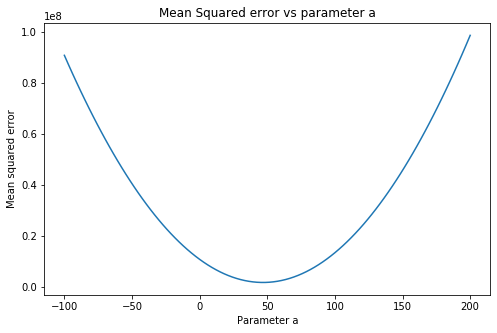

In [19]:
alpha_list = np.linspace(-100,200,100)

loss_2d = []
for alpha_param in alpha_list:
    loss_2d.append(loss_function(x,y,alpha_param,0,prediction_function))

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(alpha_list,loss_2d)
plt.title("Mean Squared error vs parameter a")
plt.xlabel("Parameter a")
plt.ylabel("Mean squared error")
fig.savefig("mse.png")


# Visualizing linear regression

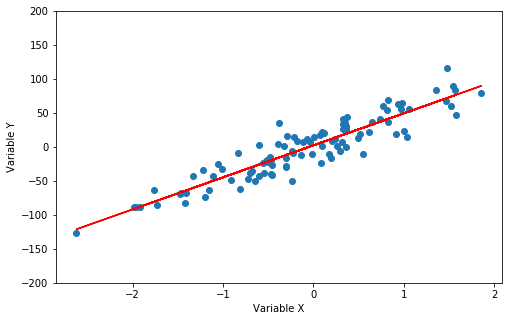

In [21]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_ylim([-200,200])
ax1.scatter(x,y)
plt.xlabel("Variable X")
plt.ylabel("Variable Y")

#fig.savefig("linear_plot.png")
plt.plot(x,prediction_function(x,alpha,beta),color="r")

# Stochastic Gradient Descent 3D animation

In [34]:
list_test = list_point[::10]
list_test_stochastic = list_point_stochastic[::10]

In [35]:
grid_z = []

for beta in beta_grid:
    row_list = []
    for alpha in alpha_grid:
        row_list.append(loss_function(x,y,alpha,beta,prediction_function))
    grid_z.append(row_list)

In [36]:
x_data = []
y_data = []
z_data = []
z_data_2d = []
for alpha,beta in list_test:
    x_data.append(alpha)
    y_data.append(beta)
    z_data.append(loss_function(x,y,alpha,beta,prediction_function))
    z_data_2d.append(loss_function(x,y,alpha,0,prediction_function))
    

x_data_stochastic = []
y_data_stochastic = []
z_data_stochastic = []

for alpha,beta in list_test_stochastic:
    x_data_stochastic.append(alpha)
    y_data_stochastic.append(beta)
    z_data_stochastic.append(loss_function(x,y,alpha,beta,prediction_function))
    

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
%matplotlib notebook

<IPython.core.display.Javascript object>


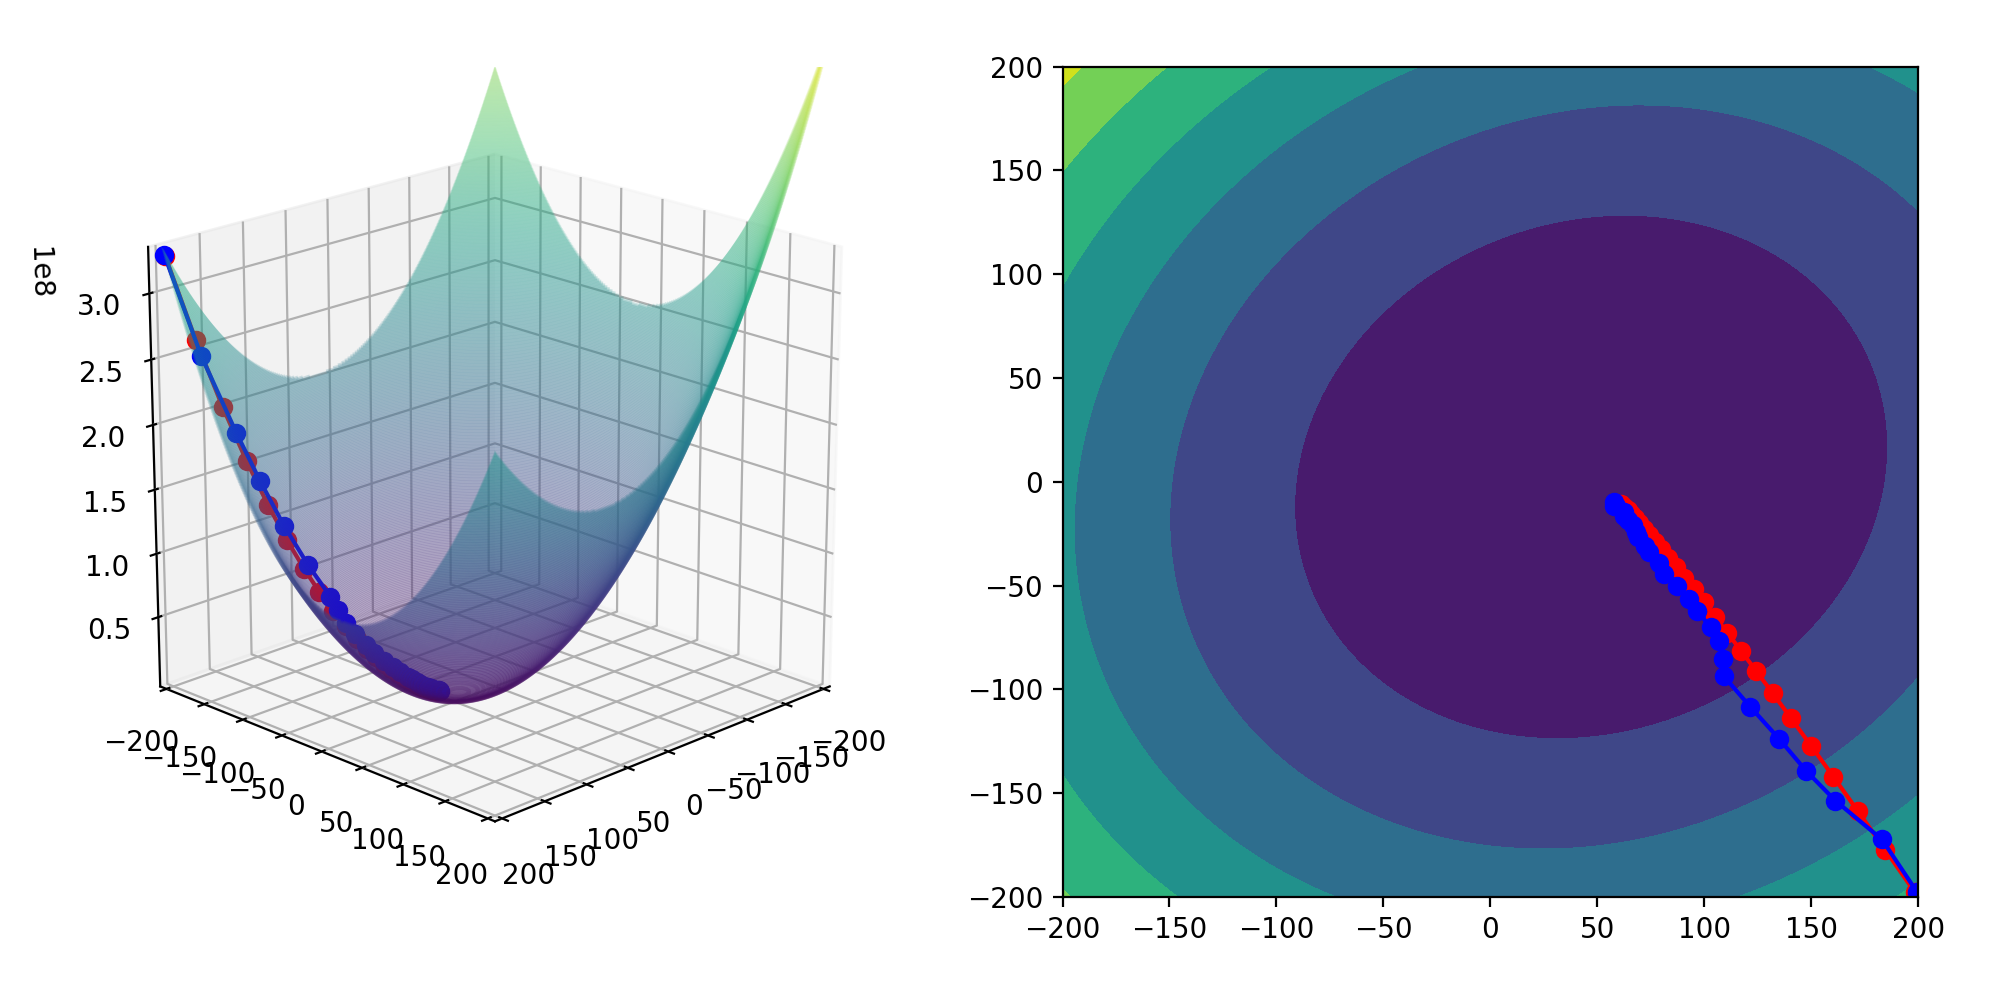

/Users/baptiste/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'color'
  import sys
MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [38]:
data = np.array([[x_data,y_data,z_data]])
data_stochastic = np.array([[x_data_stochastic,y_data_stochastic,z_data_stochastic]])

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

ax1.contour3D(grid_alpha, grid_beta, grid_z, 500, color="red",alpha=0.2)
ax1.view_init(elev=20., azim=45)
lines = [ax1.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1],color="red")[0] for dat in data]
lines_stochastic = [ax1.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1],color="blue")[0] for dat in data_stochastic]

ax1.set_xlim([-200,200])
ax1.set_ylim([-200,200])
ax1.set_zlim([min(z_data),max(z_data)])

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlim([-200,200])
ax2.set_ylim([-200,200])

cp = ax2.contourf(alpha_grid,beta_grid,grid_z, cmap='viridis')
line2, = ax2.plot([],[],color='red',marker="o")
line3, = ax2.plot([],[],color='blue',marker="o")


def update_lines(num, dataLines, data_stochastic, lines,lines_stochastic,line2,line3):
    
    line2.set_data(x_data[0:num], y_data[0:num])
    line3.set_data(x_data_stochastic[0:num], y_data_stochastic[0:num])
    
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...

        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        line.set_marker("o")
        
    for line, data in zip(lines_stochastic, data_stochastic):
        # NOTE: there is no .set_data() for 3 dim data...

        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        line.set_marker("o")
    
    
        
    return lines,lines_stochastic,line2,line3


line_ani = animation.FuncAnimation(fig, update_lines, fargs=(data,data_stochastic,lines,lines_stochastic,line2,line3),
                                   frames=30, blit=False)


fig.tight_layout(pad=2.0)

#line_ani.save('stochastic_gradient_descent.gif', writer="PillowWriter")
#fig.savefig('last_frame.png', writer="PillowWriter")

# Gradient Descent 2D animation

<IPython.core.display.Javascript object>


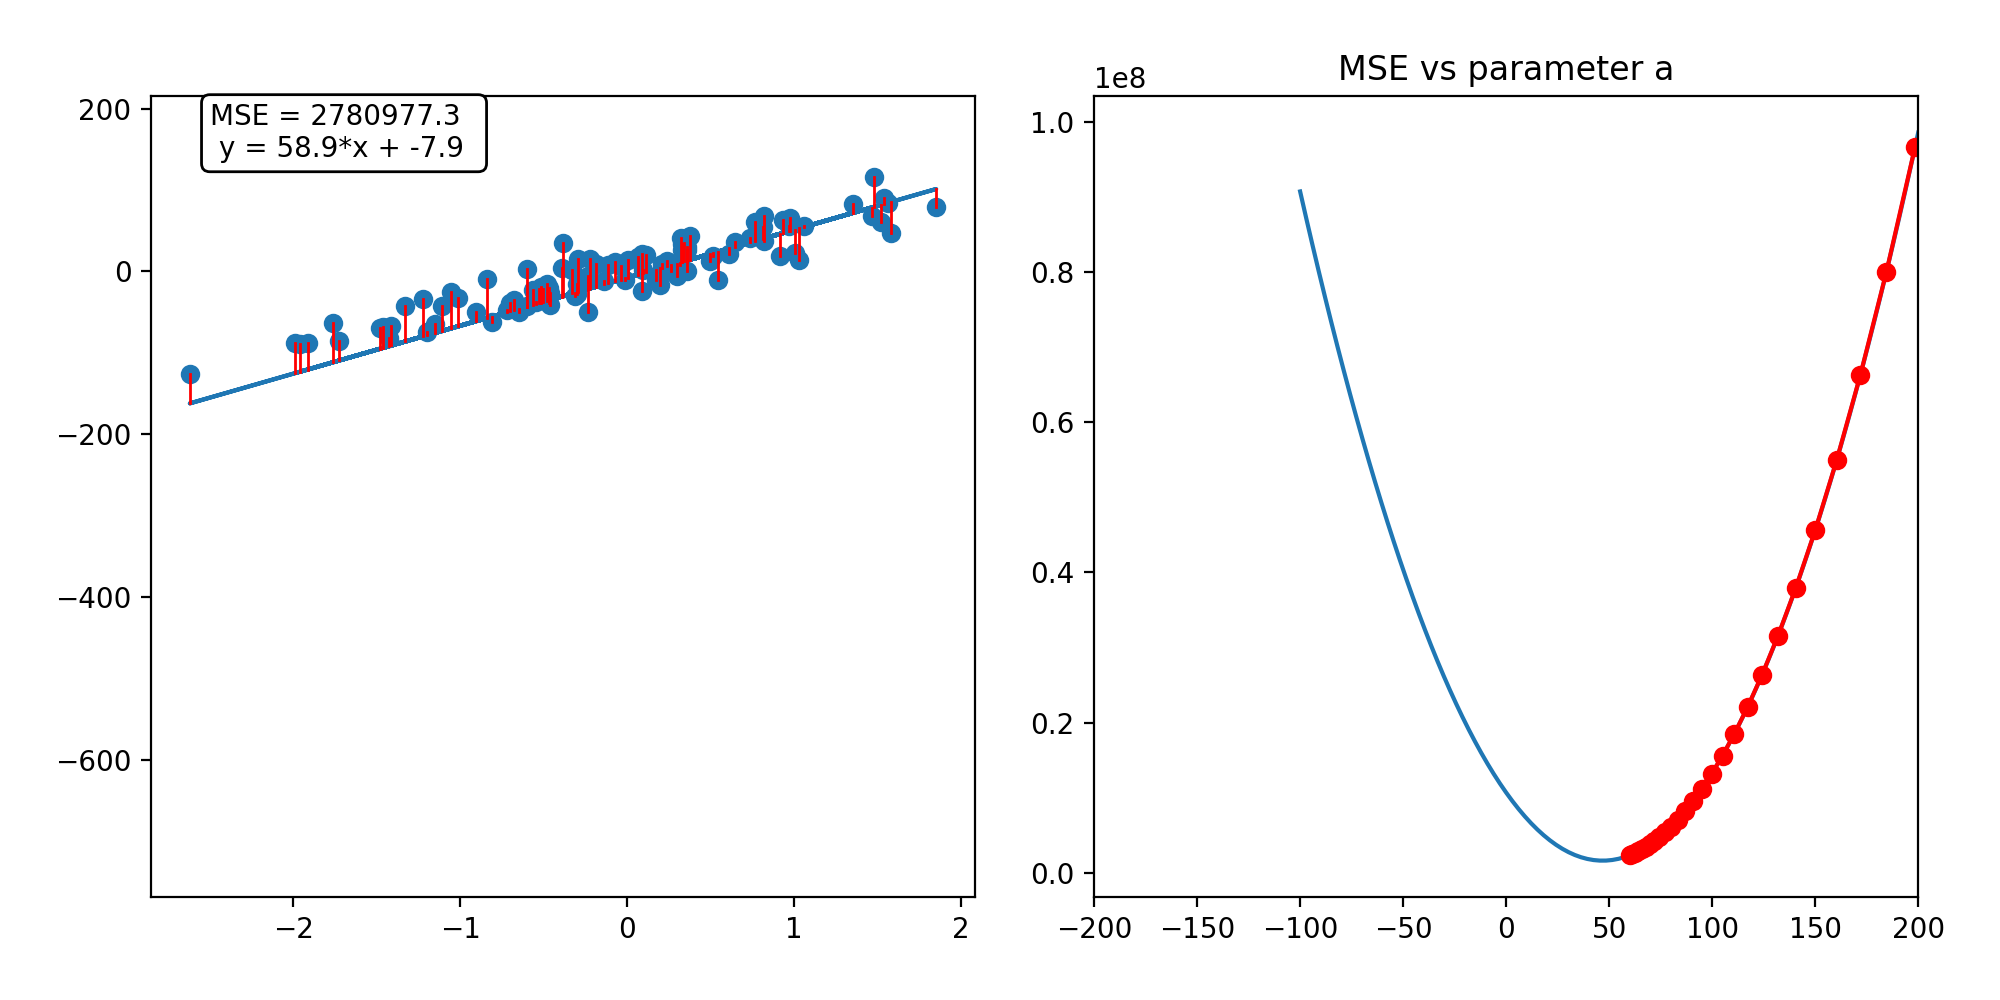

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [39]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)

scatter = ax1.scatter(x,y)
decision_function, = ax1.plot(x,prediction_function(x,200,-200))
lines = [ax1.plot([x[i],x[i]],[prediction_function(x[i],200,-200),y[i]],color="r",linewidth=1) for i in range(0,len(x))]

title = ax1.text(-2.5,140,f'MSE = {z_data[0]:.1f}  \n y = {x_data[0]:.1f}*x + {y_data[0]:.1f}',bbox=dict(boxstyle='round', fc='w'))


ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlim([-200,200])
ax2.set_title("MSE vs parameter a")
ax2.plot(alpha_list,loss_2d)
line2, = ax2.plot([],[],color='r',marker="o")


def update_graph(num):
    
    line2.set_data(x_data[0:num],z_data_2d[0:num])
    decision_function.set_data(x,prediction_function(x,x_data[num],y_data[num]))
    
    title.set_text(f'MSE = {z_data[num]:.1f}  \n y = {x_data[num]:.1f}*x + {y_data[num]:.1f}')

    
    for i in range(0,len(x)):
        lines[i][0].set_data([x[i],x[i]],[prediction_function(x[i],x_data[num],y_data[num]),y[i]])
    
    return decision_function,title,lines,line2


line_ani = animation.FuncAnimation(fig, update_graph,
                                   frames=30, blit=False)


fig.tight_layout(pad=2.0)

#line_ani.save('gradient_descent_parameter_a.gif', writer="PillowWriter")
#fig.savefig('last_frame.png', writer="PillowWriter")

<IPython.core.display.Javascript object>


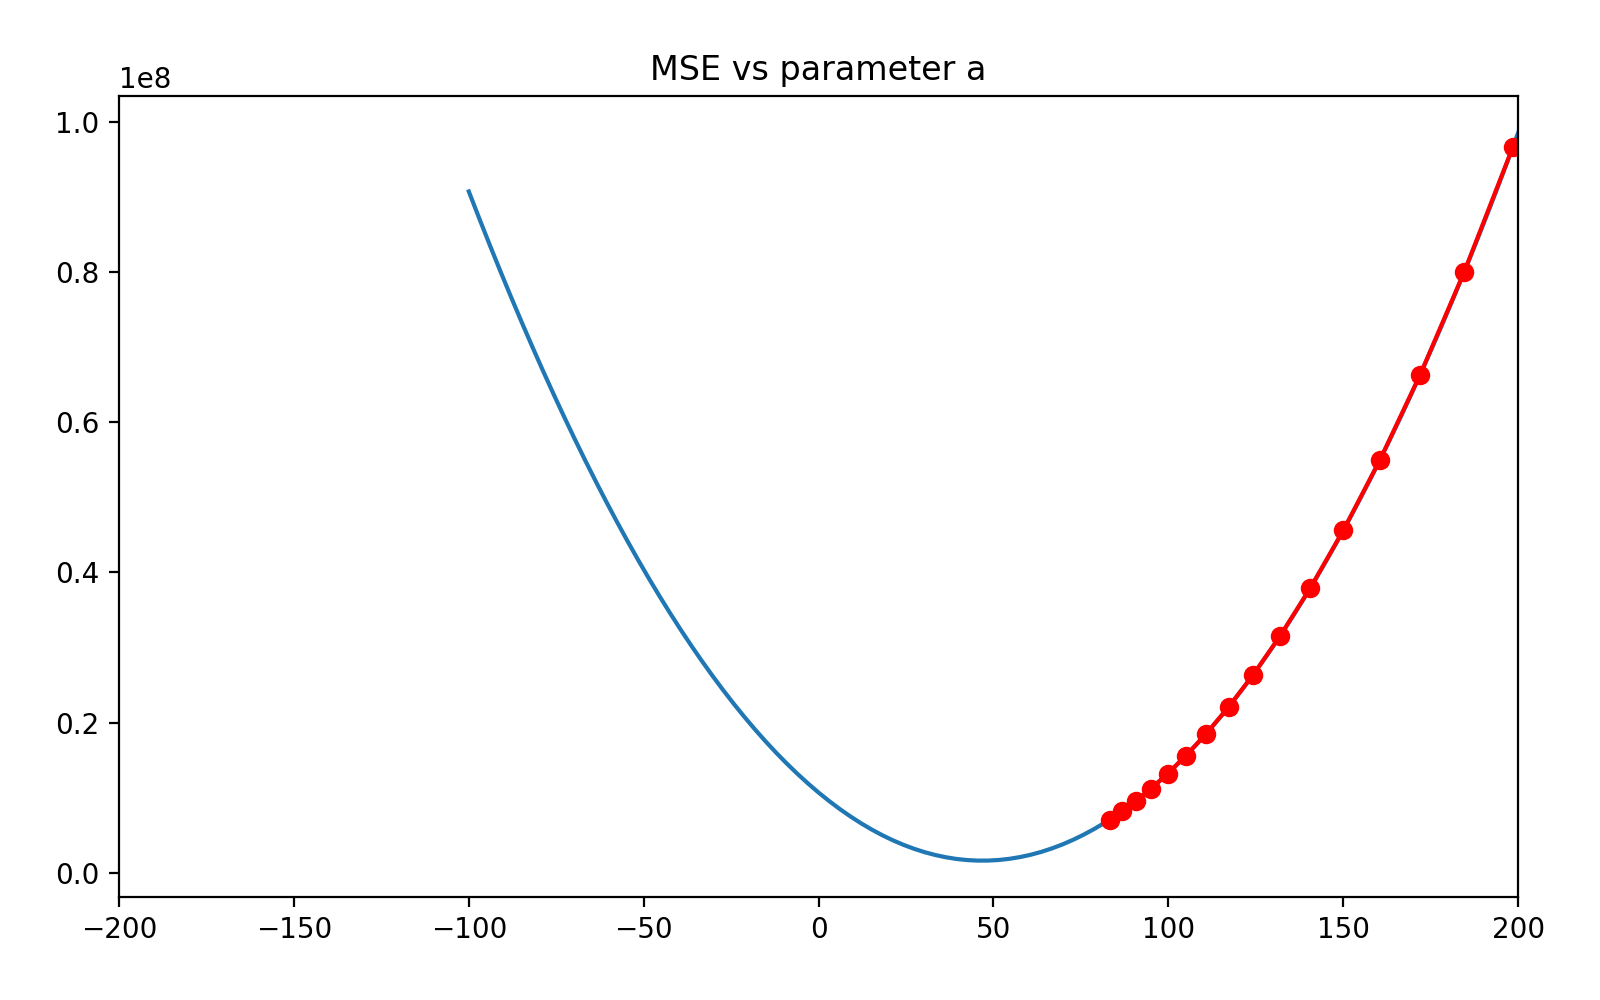

In [42]:
fig = plt.figure(figsize=(8,5))

ax2 = fig.add_subplot(1, 1, 1)
ax2.set_xlim([-200,200])
ax2.set_title("MSE vs parameter a")
ax2.plot(alpha_list,loss_2d)
line2, = ax2.plot([],[],color='r',marker="o")

def update_graph(num):
    
    line2.set_data(x_data[0:num],z_data_2d[0:num])

    return line2


line_ani = animation.FuncAnimation(fig, update_graph,
                                   frames=30, blit=False)


fig.tight_layout(pad=2.0)

#line_ani.save('gradient_descent_parameter_a.gif', writer="PillowWriter")
#fig.savefig('gradient_descent_parameter_a.png', writer="PillowWriter")